In [13]:
#visualize ground truth
import nibabel as nib
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import robustReebConstruction as rc
import os
import pickle
from mpl_toolkits.mplot3d import Axes3D
def graph_vis(G, node_loc, streamlines, ref_streamlines,file):
    # 3d spring layout
    pos = node_loc
    # Create the 3D figure
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection="3d")
    # Extract node and edge positions from the layout
    try:
        node_xyz = np.array([pos[v] for v in sorted(G)])
        edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])
        # Plot the nodes - alpha is scaled by "depth" automatically
        ax.scatter(*node_xyz.T, s=100, ec="w",label = None)
    except:
        pass

    

    
    for i in range(len(ref_streamlines)):
        xdata = []
        ydata = []
        zdata = []
        for j in ref_streamlines[i]:
            xdata.append(j[0])
            ydata.append(j[1])
            zdata.append(j[2])
        ax.plot3D(xdata,ydata,zdata,color= '#bfbfbf', alpha = 0.7, lw = 2);
    for i in range(len(streamlines)):
        xdata = []
        ydata = []
        zdata = []
        for j in streamlines[i]:
            xdata.append(j[0])
            ydata.append(j[1])
            zdata.append(j[2])
        ax.plot3D(xdata,ydata,zdata,color= '#eb7a30', alpha = 0.7, lw = 2);
    try:
        # Plot the nodes
        ax.scatter(*node_xyz.T, s=400, ec="w", color = 'r', zorder=100)
        edge_labels = nx.get_edge_attributes(G, "weight")
        # Plot the edges
        weight_labels = list(edge_labels.values())
        count = 0
        for vizedge in edge_xyz:
            wt = weight_labels[count]*5
            if wt == 10:
                ax.plot(*vizedge.T, color='g',
                        lw = wt,
                        zorder = 50,
                    label = str(weight_labels[count]))
            else:
                ax.plot(*vizedge.T, color='#000000',
                        lw = wt,
                        zorder = 50,
                    label = str(weight_labels[count]))
            count+=1
    except:
        pass

    def _format_axes(ax):
        """Visualization options for the 3D axes."""
        # Turn gridlines off
        ax.grid(False)
        # Suppress tick labels
        for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
            dim.set_ticks([])
        # Set axes labels
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")


    _format_axes(ax)
    fig.tight_layout()
    #place title next to figure
    fig.subplots_adjust(top=0.85)

    plt.title(file)
    plt.axis("off")
    # plt.legend()

n =  3224


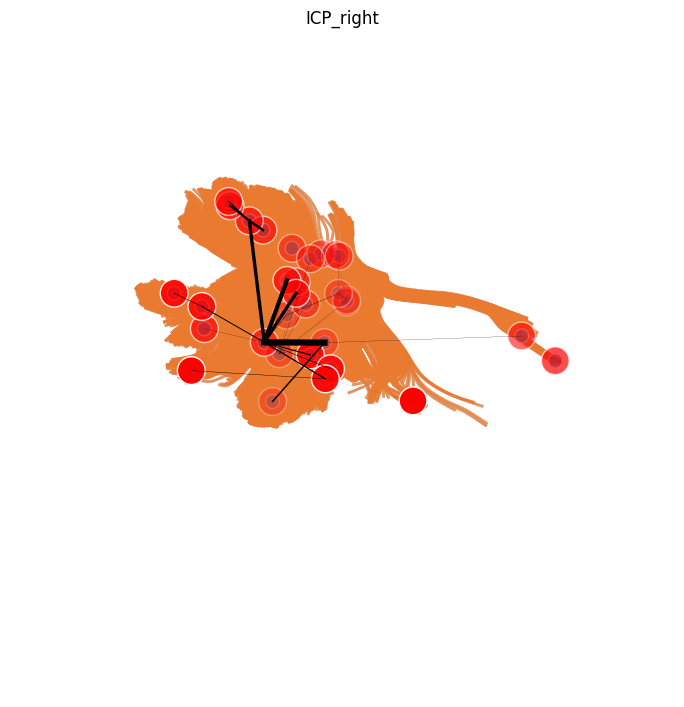

In [14]:
path = "/media/hdd2/shailja/ismrm_tractogram_comparison/gt_bundles/"
bundle = "ICP_right"
with open(path+bundle+"eps5thr2.5np50.gpickle", 'rb') as handle:
    H = pickle.load(handle)
# CC_VSeps5thr3.gpickle,
with open(path+bundle+"eps5thr2.5np50.pickle", 'rb') as handle:
    node_loc_all = pickle.load(handle)
trkpathI = path+bundle+".trk"    
p_streamlines =  nib.streamlines.load(trkpathI)
print("n = ",len(p_streamlines.streamlines))
streamlines = p_streamlines.streamlines
graph_vis(H, node_loc_all,streamlines, streamlines, bundle)


9_0
Fornix_VS.trk 2595
140
n =  2595
18_3
Fornix_VS.trk 38
6
n =  38
10_2
Fornix_VS.trk 537
15
n =  537
6_1
Fornix_VS.trk 1514
27
n =  1514
9_1
Fornix_VS.trk 915
6_3
Fornix_VS.trk 1545
24
n =  1545
10_16
Fornix_VS.trk 515
14
n =  515


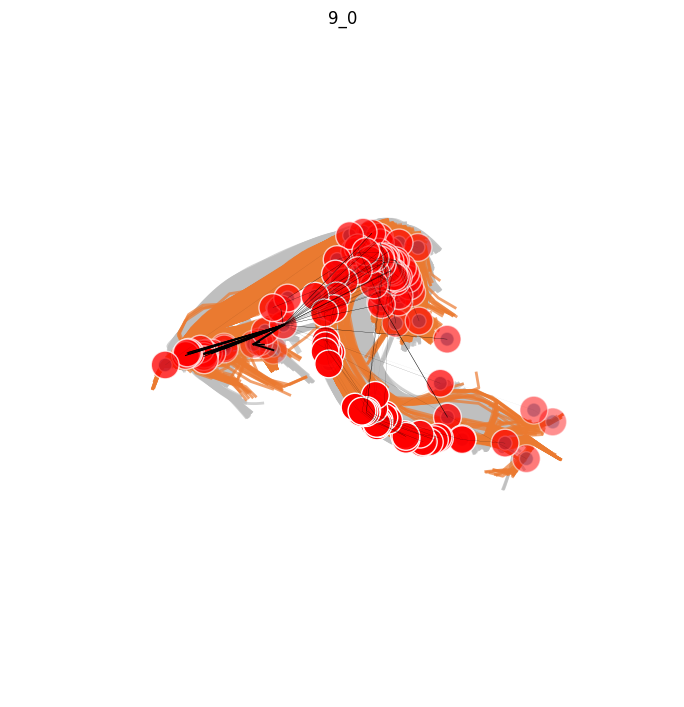

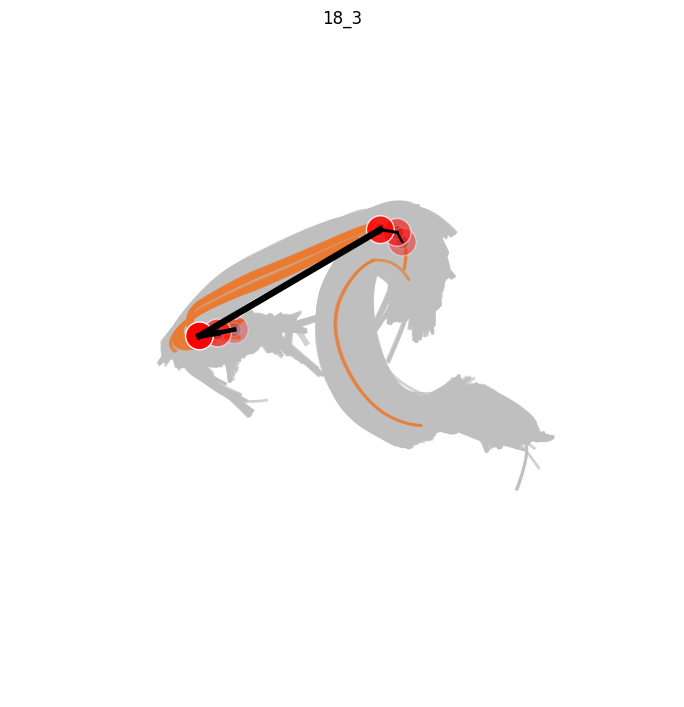

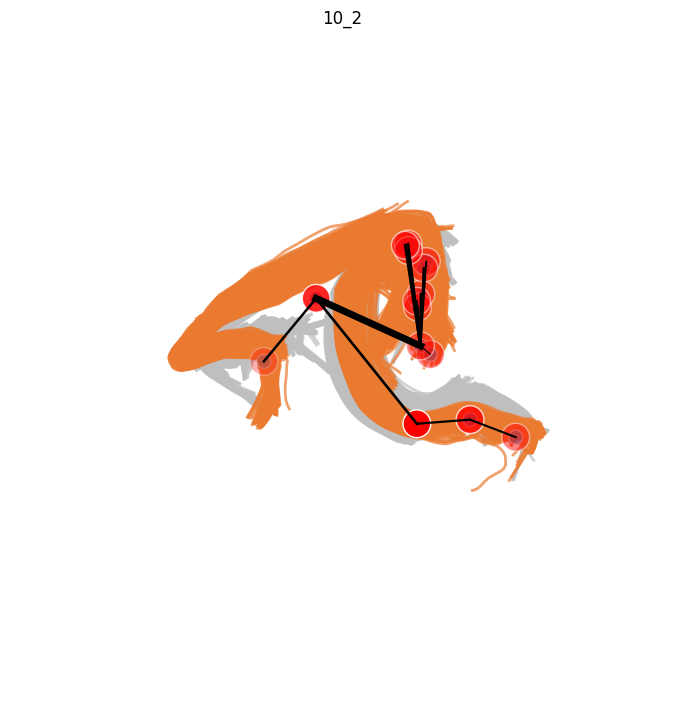

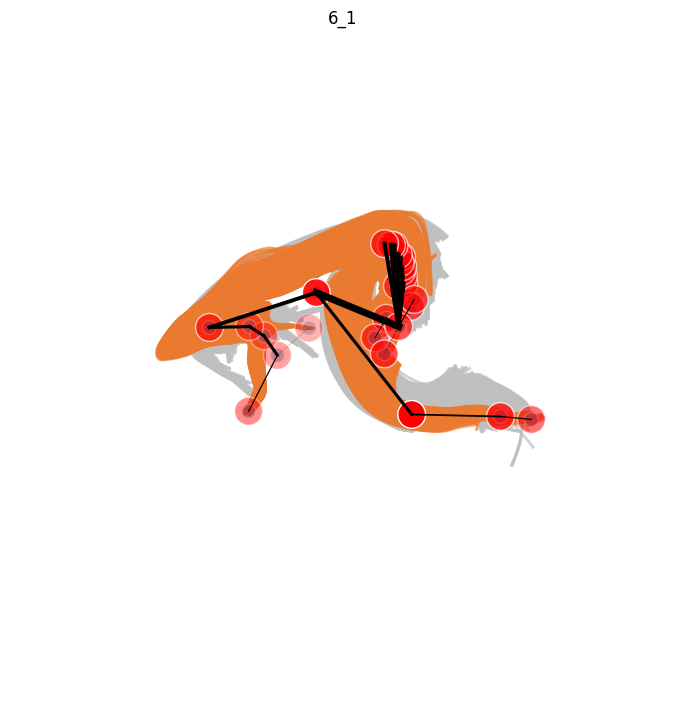

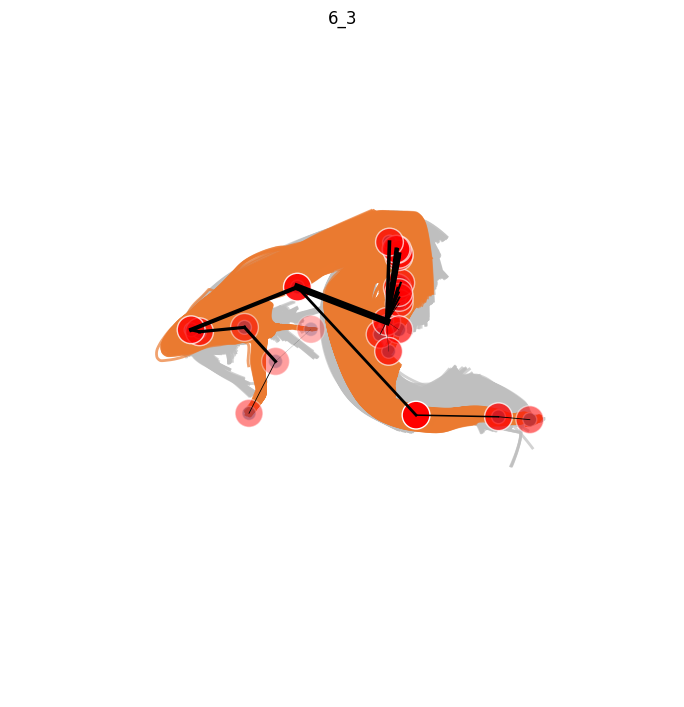

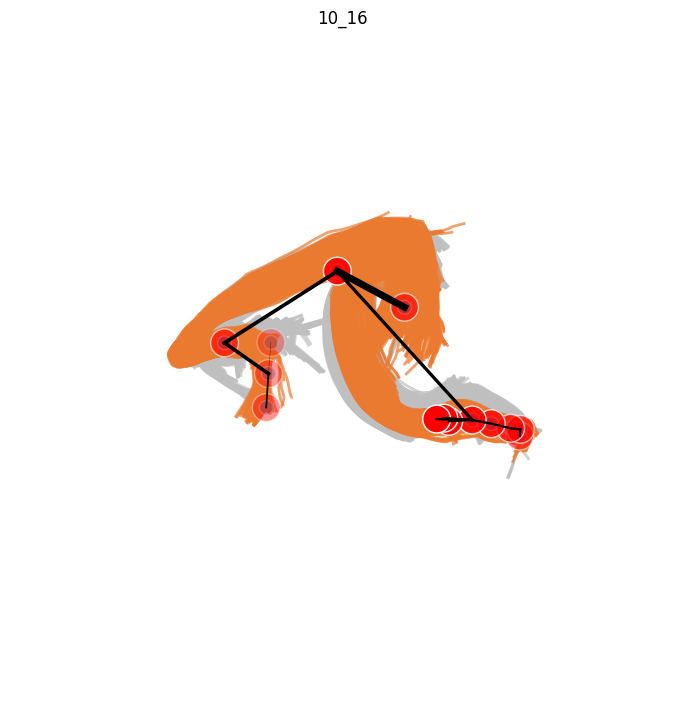

In [12]:
#check how many methods have CP

methods = os.listdir("/home/shailja/ismrmMethodOutput/")
for method in methods:
    if str(method) in ["6_3","6_1","10_2","9_1","18_3","9_0","10_16"]:
    # if str(method) in ["10_7","10_12","10_15","10_19","10_13","14_0"]:
    # if str(method) in ["6_1","6_3","10_11","10_2","18_3","9_1","9_0","10_16"]:
    # if str(method) in ["13_2", "18_1","13_3","18_1","10_2","13_1","13_0","1_1"]:
    # if str(method) in ["1_2","18_1","10_11","9_1","10_4","18_3","13_1","9_0","10_4","6_1"]:#SCP_left
#     if str(method) in ["9_0","9_3","10_15","9_1","10_14","13_1","10_14","10_6"]:#SCP_right
#     if str(method) in ["10_7","10_2","10_19","14_0","10_13"]:#CA
        trk_files = os.listdir("/home/shailja/ismrmMethodOutput/"+method+"/segmented_VB/")
        for file in trk_files:
            if file ==bundle+"_VS.trk":
                try:
                    print(method)
                    p_streamlines =  nib.streamlines.load("/home/shailja/ismrmMethodOutput/"+method+"/segmented_VB/"+bundle+"_VS.trk")
                    print(file, len(p_streamlines.streamlines))
                    path = "/home/shailja/ismrmMethodOutput/"+method+"/segmented_VB/"
                    with open(path+bundle+"_VSeps5thr2.5np50.gpickle", 'rb') as handle:
                        H = pickle.load(handle)
                    print(len(H.nodes()))

                    with open(path+bundle+"_VSeps5thr2.5np50.pickle", 'rb') as handle:
                        node_loc_all = pickle.load(handle)
                    trkpathI = path+bundle+"_VS.trk"    
                    p_streamlines =  nib.streamlines.load(trkpathI)
                    print("n = ",len(p_streamlines.streamlines))
                    streamlines1 = p_streamlines.streamlines
                    graph_vis(H, node_loc_all,streamlines1, streamlines,method)
                except:
                    pass


